# Project Property Price Prediction

This project aims to predict property prices using machine learning techniques. We will use the `California Housing Prices`
dataset containing various features of properties and their corresponding prices to build a regression model.

## Step 1: Import Libraries

First, we need to import the necessary libraries.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


import warnings
warnings.filterwarnings('ignore')

# Step 2: Load the Dataset
Next, we will load the California Housing Prices dataset.

In [1]:
from sklearn.datasets import fetch_california_housing

# Load the dataset
california_housing = fetch_california_housing()

# # Create a DataFrame
# data = pd.DataFrame(data=california_housing.data, columns=california_housing.feature_names)
# data['Price'] = california_housing.target


# # Display the first few rows
# data.head()


In [9]:
data = pd.DataFrame(california_housing['data'],columns=california_housing.feature_names)

data['price'] = california_housing['target']

data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### This dataset includes features such as:

- **MedInc**: Median income in block group
- **HouseAge**: Median house age in block group
- **AveRooms**: Average number of rooms per household
- **AveBedrms**: Average number of bedrooms per household
- **Population**: Block group population
- **AveOccup**: Average number of household members
- **Latitude**: Block group latitude
- **Longitude**: Block group longitude
- **Price**: Median house value for California districts

# Step 3: Exploratory Data Analysis (EDA)
Let's perform some basic EDA to understand the dataset better.

In [20]:
data.shape

(20640, 9)

In [21]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Price'],
      dtype='object')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
data['HouseAge'].value_counts().sort_values()

HouseAge
1.0        4
51.0      48
2.0       58
3.0       62
49.0     134
50.0     136
6.0      160
7.0      175
48.0     177
4.0      191
47.0     198
9.0      205
8.0      206
12.0     238
5.0      244
46.0     245
11.0     254
10.0     264
45.0     294
41.0     296
13.0     302
40.0     304
43.0     353
44.0     356
42.0     368
39.0     369
38.0     394
22.0     399
14.0     412
21.0     446
23.0     448
31.0     458
29.0     461
20.0     465
28.0     471
30.0     476
24.0     478
27.0     488
19.0     502
15.0     512
37.0     537
32.0     565
25.0     566
18.0     570
33.0     615
26.0     619
34.0     689
17.0     698
16.0     771
35.0     824
36.0     862
52.0    1273
Name: count, dtype: int64

In [7]:
# Summary statistics
data.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


## Missing Values

In [8]:
# Check for missing values
data.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Price         0
dtype: int64

# Correlation Matrix

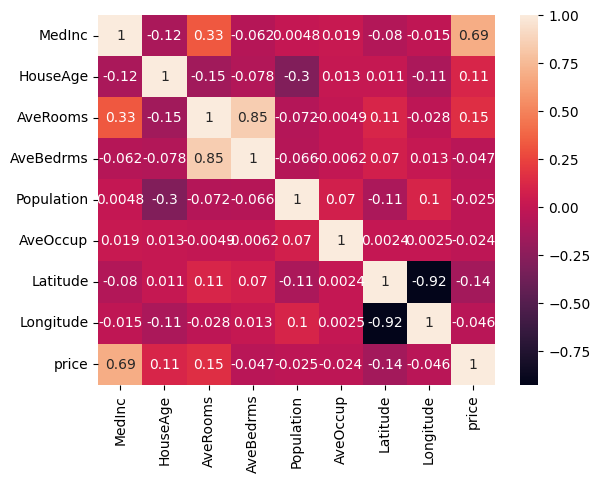

In [15]:
# Correlation matrix

sns.heatmap(data.corr(), annot=True)
plt.show()

## Pair Plot

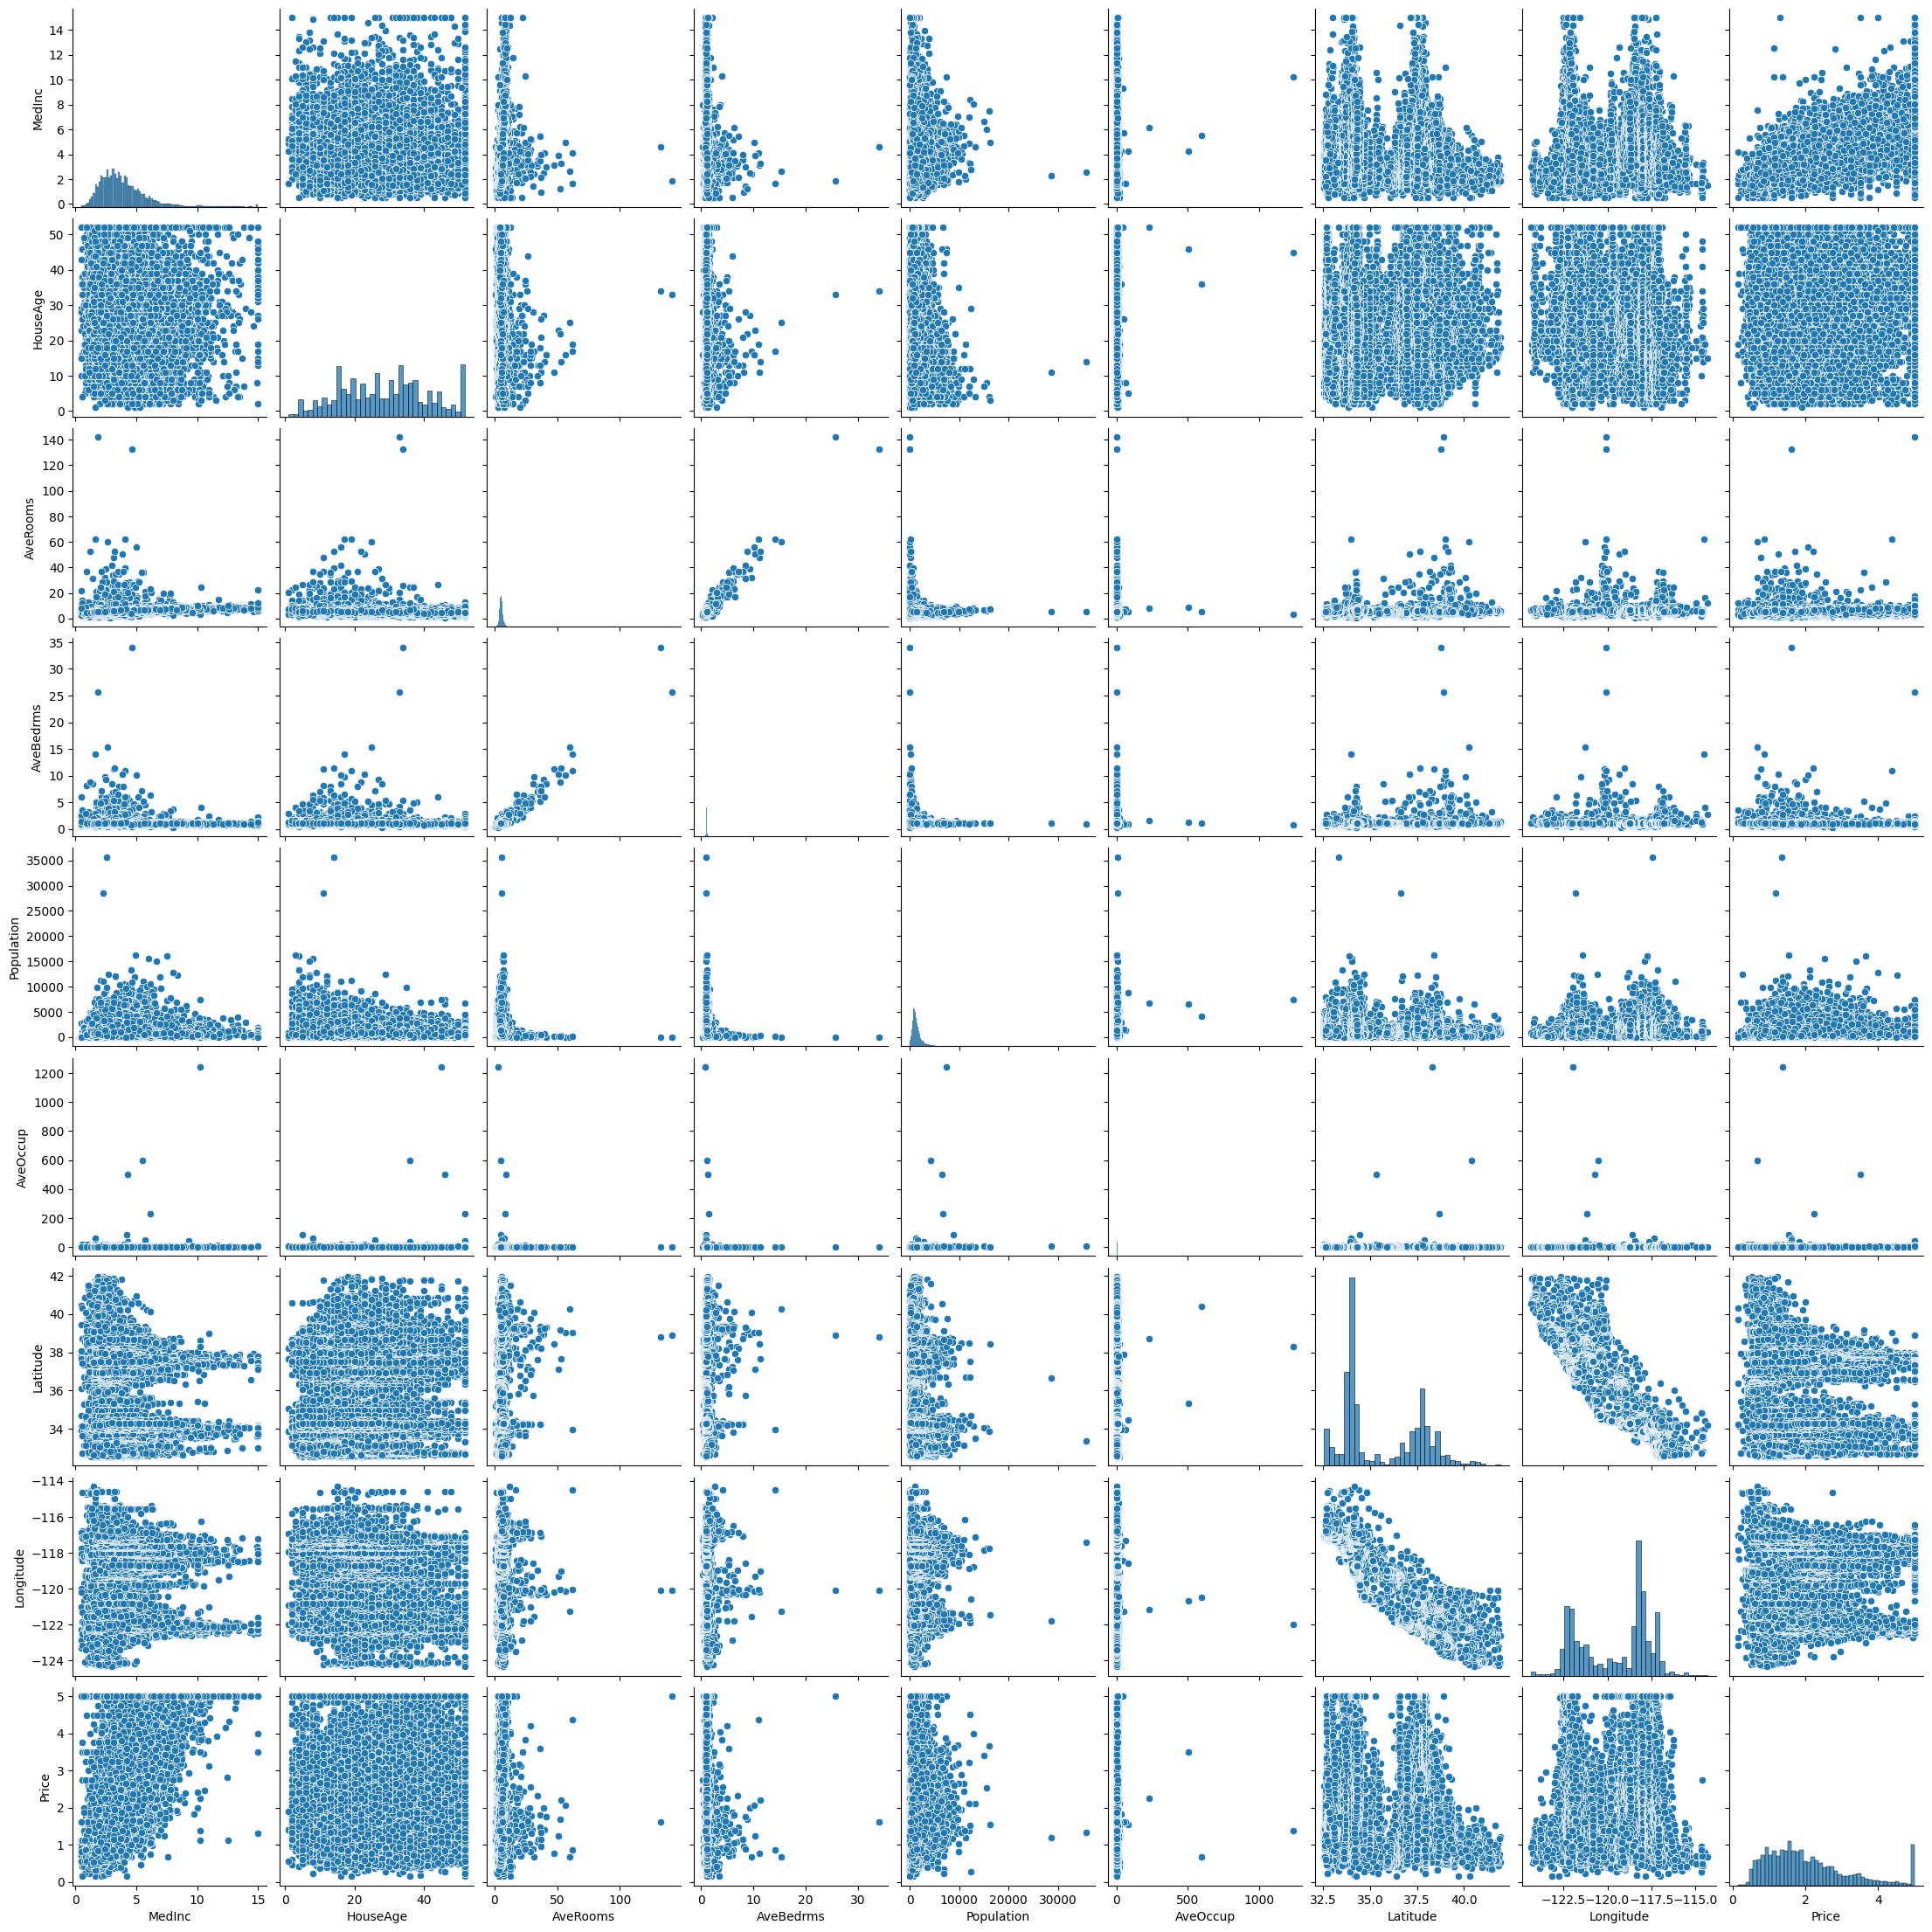

In [10]:
# Pair plot
sns.pairplot(data)
plt.show()


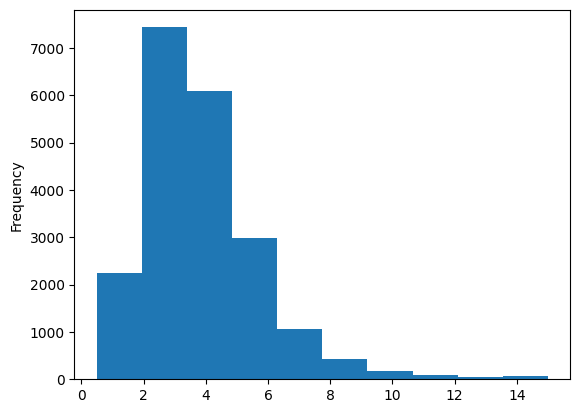

In [16]:
data['MedInc'].plot.hist()
plt.show()

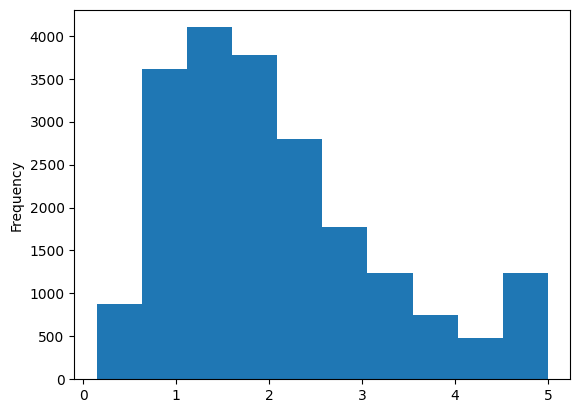

In [38]:
data['Price'].plot.hist()
plt.show()

# Step 4: Data Preprocessing
We will handle missing values, encode categorical variables, and scale the features. Since this dataset has no missing values or categorical variables, we only need to scale the features

## Feature Scaling

In [11]:
# # Feature scaling
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(data.drop('Price', axis=1))

# # Convert back to DataFrame
# scaled_data = pd.DataFrame(scaled_features, columns=data.columns[:-1])
# scaled_data['Price'] = data['Price']


In [62]:
X = data.drop('price',axis = 1)
X.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
5063,2.5547,39.0,4.148305,0.995763,857.0,3.631356,33.99,-118.29


In [63]:
scaler = StandardScaler()

X_scalled = scaler.fit_transform(X)
X_scalled

array([[ 2.34476576,  0.98214266,  0.62855945, ..., -0.04959654,
         1.05254828, -1.32783522],
       [ 2.33223796, -0.60701891,  0.32704136, ..., -0.09251223,
         1.04318455, -1.32284391],
       [ 1.7826994 ,  1.85618152,  1.15562047, ..., -0.02584253,
         1.03850269, -1.33282653],
       ...,
       [-1.14259331, -0.92485123, -0.09031802, ..., -0.0717345 ,
         1.77823747, -0.8237132 ],
       [-1.05458292, -0.84539315, -0.04021111, ..., -0.09122515,
         1.77823747, -0.87362627],
       [-0.78012947, -1.00430931, -0.07044252, ..., -0.04368215,
         1.75014627, -0.83369581]])

# Step 5: Train-Test Split
We will split the data into training and testing sets.

In [64]:
from sklearn.model_selection import train_test_split

X = X_scalled
y = data['price']

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state= 42)

print('done')

done


# Step 6: Model Training
We will train multiple models and compare their performance.

### Linear Regression

In [65]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)



print('Linear Regression Performance:')
print('MAE:', mae_lr)
print('MSE:', mse_lr)
print('RMSE:', rmse_lr)
print('R-squared:', r2_lr)


Linear Regression Performance:
MAE: 0.5332001304956565
MSE: 0.5558915986952442
RMSE: 0.7455813830127763
R-squared: 0.575787706032451


In [66]:
# ridge Regression
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge_model.predict(X_test)

# Evaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)



print('Ridge Regression Performance:')
print('MAE:', mae_ridge)
print('MSE:', mse_ridge)
print('RMSE:', rmse_ridge)
print('R-squared:', r2_ridge)


Ridge Regression Performance:
MAE: 0.5331933646313115
MSE: 0.5558512007367508
RMSE: 0.7455542909384606
R-squared: 0.5758185345441325


### Ridge Regression

In [67]:
# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluation
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print('Ridge Regression Performance:')
print('MAE:', mae_ridge)
print('MSE:', mse_ridge)
print('RMSE:', rmse_ridge)
print('R-squared:', r2_ridge)


Ridge Regression Performance:
MAE: 0.5331933646313115
MSE: 0.5558512007367508
RMSE: 0.7455542909384606
R-squared: 0.5758185345441325


### Lasso Regression

In [68]:
# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluation
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print('Lasso Regression Performance:')
print('MAE:', mae_lasso)
print('MSE:', mse_lasso)
print('RMSE:', rmse_lasso)
print('R-squared:', r2_lasso)


Lasso Regression Performance:
MAE: 0.6221475526943097
MSE: 0.6795515190149224
RMSE: 0.824349148731848
R-squared: 0.4814202815313764


In [99]:
X_train

array([[-0.32165429,  0.34647803, -0.16625886, ...,  0.05980847,
        -1.36797628,  1.26764451],
       [-0.03061993,  1.61780729, -0.3861807 , ..., -0.12830597,
        -0.87169852,  0.7036268 ],
       [ 0.1503488 , -1.95780625,  0.08764093, ..., -0.03345346,
        -0.45501247, -0.45435647],
       ...,
       [-0.49283239,  0.58485227, -0.58294927, ...,  0.02517025,
        -0.74997001,  0.59381804],
       [ 0.97302487, -1.08376738,  0.39058403, ...,  0.01042151,
         0.91209231, -1.19306993],
       [-0.68174943,  1.85618152, -0.81905034, ..., -0.09262259,
         1.00104776, -1.42267006]])

### OLS Model

In [100]:
import statsmodels.api as sm
new_X_train =  sm.add_constant(X_train)

ols_model = sm.OLS(y_train,new_X_train).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     3261.
Date:                Tue, 25 Jun 2024   Prob (F-statistic):               0.00
Time:                        12:19:03   Log-Likelihood:                -17998.
No. Observations:               16512   AIC:                         3.601e+04
Df Residuals:                   16503   BIC:                         3.608e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0679      0.006    369.104      0.000       2.057       2.079
x1             0.8524      0.009     95.697      0.000       0.835       0.870
x2             0.1224      0.006     19.665      0.000       0.110       0.135
x3            -0.3051      0.016    -18.677      0.000      -0.337      -0.273
x4             0.3711      0.016     23.556      0.000       0.340       0.402
x5            -0.0023      0.006     -0.387      0.699      -0.014       0.009
x6            -0.0366      0.005     -7.253      0.000      -0.047      -0.027
x7            -0.8966      0.017    -52.767      0.000      -0.930      -0.863
x8            -0.8689      0.017    -52.117      0.000      -0.902      -0.836
==============================================================================
Omnibus:                     3333.187   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9371.466
Skew:                           1.071   Prob(JB):                         0.00
Kurtosis:                       6.006   Cond. No.                         6.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
new_X_test = sm.add_constant(X_test)

y_pred_ols = ols_model.predict(new_X_test)

In [88]:
mae_ols = mean_absolute_error(y_test,y_pred_ols)
mse_ols = mean_squared_error(y_test,y_pred_ols)
rmse_ols = np.sqrt(mse_ols)
r2_ols = r2_score(y_test,y_pred_ols)


In [89]:
print('OLS  Performance:')
print('MAE:', mae_ols)
print('MSE:', mse_ols)
print('RMSE:', rmse_ols)
print('R-squared:', r2_ols)

OLS  Performance:
MAE: 0.5332001304956562
MSE: 0.5558915986952441
RMSE: 0.7455813830127762
R-squared: 0.575787706032451


# Step 7: Model Evaluation
We will compare the performance of the models using the evaluation metrics.

In [101]:
# Performance comparison


model_info = {
                'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression','OLS Method'],
                'MAE': [mae_lr, mae_ridge, mae_lasso, mae_ols],
                'MSE': [mse_lr, mse_ridge, mse_lasso, mse_ols],
                'RMSE': [rmse_lr, rmse_ridge, rmse_lasso, rmse_ols],
                'R-squared': [r2_lr, r2_ridge, r2_lasso, r2_ols]
            }

performance   = pd.DataFrame(model_info)
performance

,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression,0.533200,0.555892,0.745581,0.575788
1,Ridge Regression,0.533193,0.555851,0.745554,0.575819
2,Lasso Regression,0.622148,0.679552,0.824349,0.481420
3,OLS Method,0.533200,0.555892,0.745581,0.575788


In [104]:
performance[performance['R-squared']   == performance['R-squared'].max()]

,Model,MAE,MSE,RMSE,R-squared
1,Ridge Regression,0.533193,0.555851,0.745554,0.575819


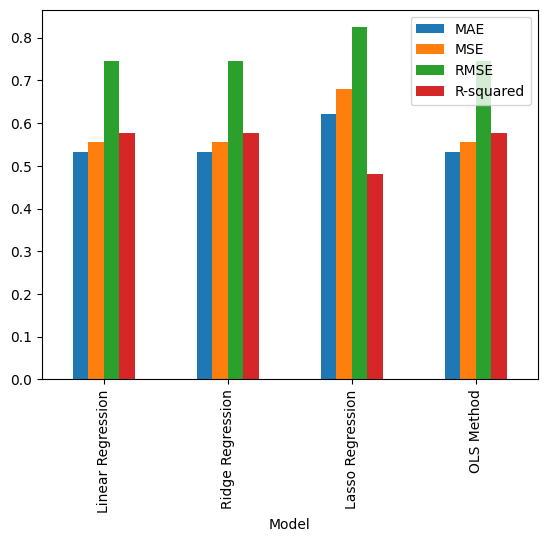

In [106]:
performance.plot(kind='bar', x = 'Model')
plt.show()

# Step 8: Conclusion
Based on the evaluation metrics, we can conclude which model performs the best for our property price prediction task. The model with the lowest MAE, MSE, RMSE, and highest R-squared value is considered the best.

# Step 9: Save the Best Model
We can save the best model using joblib or pickle for future use.

In [107]:
import joblib

# Save the best model
joblib.dump(ridge_model, 'best_model.pkl')


['best_model.pkl']

# Step 10: Load the Model and Make Predictions
We can load the saved model and make predictions on new data.

In [112]:
data.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'price'],
      dtype='object')

In [115]:
# Load the model
best_model = joblib.load('best_model.pkl')

# Make predictions
new_data = np.array([[7.2574, 22.0, 2.288136, 1.073446, 496.0, 2.802260, 37.85, -122.24]])  # Example new data

scaled_new_data = scaler.transform(new_data)


predicted_price = best_model.predict(scaled_new_data)

print('Predicted Price:', predicted_price)


Predicted Price: [4.121072]


In [114]:
# data